In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 38

idxLength = 28
idxGain = 29

In [26]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

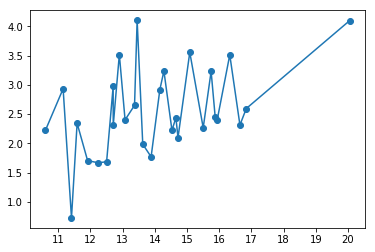

[1.        2.221452  2.932051  0.7250269 2.343448  1.703526  1.667051
 1.685171  2.971337  2.305856  3.515697  2.40039   2.649627  4.103245
 1.984478  1.768713  2.918598  3.235684  2.221452  2.437815  2.095627
 3.556305  2.264529  3.229965  2.451544  2.401826  3.511836  2.313214
 2.594537  4.098725 ]
[-1.      10.60422 11.15385 11.41353 11.58854 11.91425 12.2499  12.50423
 12.70753 12.70994 12.89956 13.07747 13.37167 13.45226 13.62694 13.88606
 14.15785 14.28359 14.53386 14.65531 14.72119 15.08688 15.50372 15.74937
 15.87537 15.93878 16.32858 16.64402 16.84166 20.05504]
Optimal lenght:  3.0021586666666664


In [27]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)